## Data Wrangling & Analysis

### Introduction

One of the most important steps of data wrangling and analysis is cleaning.

This project focuses on wrangling data from the WeRateDogs Twitter account and analyizing the data and creating visualizations. The dataset being used come from the tweet archive of the Twitter user @dog_rates (WeRateDogs). This Twitter account rates people's dogs and all of the tweets have a common denominator of 10. 

We will now gather the data from various sources and in different formats and then assess the quality and tidiness of the data. Then we will clean it.

In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import json
import os
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering

In [2]:
# Read CSV file
rate_df = pd.read_csv("twitter-archive-enhanced.csv", sep=",")

In [3]:
# Read TSV File from URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), 'wb') as file:
    file.write(response.content)
    
img_predictions_df = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True


In [4]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Use Tweepy to read API
try:
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
except:
    print("ERROR")

In [5]:
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in rate_df['tweet_id']:
        pre_start = time.time()
        try:
            tweet = api.get_status(tweet_id)
            start = time.time()
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            end = time.time()
            print('Elapsed time for tweet id {} : {}'.format(tweet_id, end - start))            
            
        except:  
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]
            
        post_end = time.time()
        print('Total time Elapsed : {}'.format(post_end - pre_start))

Elapsed time for tweet id 892420643555336193 : 0.0004773139953613281
Total time Elapsed : 0.18567514419555664
Elapsed time for tweet id 892177421306343426 : 0.006231784820556641
Total time Elapsed : 0.1778872013092041
Elapsed time for tweet id 891815181378084864 : 0.0004477500915527344
Total time Elapsed : 0.277742862701416
Elapsed time for tweet id 891689557279858688 : 0.0004436969757080078
Total time Elapsed : 0.1719982624053955
Elapsed time for tweet id 891327558926688256 : 0.000293731689453125
Total time Elapsed : 0.17080402374267578
Elapsed time for tweet id 891087950875897856 : 0.0004947185516357422
Total time Elapsed : 0.16285991668701172
Elapsed time for tweet id 890971913173991426 : 0.0002682209014892578
Total time Elapsed : 0.17038726806640625
Elapsed time for tweet id 890729181411237888 : 0.00039076805114746094
Total time Elapsed : 0.1726691722869873
Elapsed time for tweet id 890609185150312448 : 0.0002701282501220703
Total time Elapsed : 0.16402435302734375
Elapsed time for

Elapsed time for tweet id 878281511006478336 : 0.0002808570861816406
Total time Elapsed : 0.1730787754058838
Elapsed time for tweet id 878057613040115712 : 0.0005729198455810547
Total time Elapsed : 0.17293834686279297
Elapsed time for tweet id 877736472329191424 : 0.0012252330780029297
Total time Elapsed : 0.1682288646697998
Elapsed time for tweet id 877611172832227328 : 0.0015969276428222656
Total time Elapsed : 0.21977639198303223
Elapsed time for tweet id 877556246731214848 : 0.0002841949462890625
Total time Elapsed : 0.18519306182861328
Elapsed time for tweet id 877316821321428993 : 0.00038695335388183594
Total time Elapsed : 0.18807578086853027
Elapsed time for tweet id 877201837425926144 : 0.00028228759765625
Total time Elapsed : 0.22778892517089844
Elapsed time for tweet id 876838120628539392 : 0.0004420280456542969
Total time Elapsed : 0.17482590675354004
Elapsed time for tweet id 876537666061221889 : 0.0008139610290527344
Total time Elapsed : 0.18951773643493652
Elapsed time 

Elapsed time for tweet id 862722525377298433 : 0.0002961158752441406
Total time Elapsed : 0.16892671585083008
Elapsed time for tweet id 862457590147678208 : 0.0003845691680908203
Total time Elapsed : 0.1829681396484375
Elapsed time for tweet id 862096992088072192 : 0.0006392002105712891
Total time Elapsed : 0.1717066764831543
ERROR: Error on tweet id 861769973181624320
Total time Elapsed : 0.14732623100280762
Elapsed time for tweet id 861383897657036800 : 0.0005826950073242188
Total time Elapsed : 0.16547489166259766
Elapsed time for tweet id 861288531465048066 : 0.0002772808074951172
Total time Elapsed : 0.18752050399780273
Elapsed time for tweet id 861005113778896900 : 0.0005981922149658203
Total time Elapsed : 0.18045282363891602
Elapsed time for tweet id 860981674716409858 : 0.0005555152893066406
Total time Elapsed : 0.16924548149108887
Elapsed time for tweet id 860924035999428608 : 0.0013034343719482422
Total time Elapsed : 0.18021535873413086
Elapsed time for tweet id 86056377314

Elapsed time for tweet id 848324959059550208 : 0.0004487037658691406
Total time Elapsed : 0.17256402969360352
Elapsed time for tweet id 848213670039564288 : 0.0002536773681640625
Total time Elapsed : 0.17335247993469238
Elapsed time for tweet id 848212111729840128 : 0.0003285408020019531
Total time Elapsed : 0.19510579109191895
Elapsed time for tweet id 847978865427394560 : 0.0008857250213623047
Total time Elapsed : 0.1755974292755127
Elapsed time for tweet id 847971574464610304 : 0.0011420249938964844
Total time Elapsed : 0.20737361907958984
Elapsed time for tweet id 847962785489326080 : 0.00046324729919433594
Total time Elapsed : 0.1697371006011963
Elapsed time for tweet id 847842811428974592 : 0.000286102294921875
Total time Elapsed : 0.18550992012023926
Elapsed time for tweet id 847617282490613760 : 0.0003676414489746094
Total time Elapsed : 0.17258691787719727
Elapsed time for tweet id 847606175596138505 : 0.0007569789886474609
Total time Elapsed : 0.16940760612487793
Elapsed time

Elapsed time for tweet id 836380477523124226 : 0.0002968311309814453
Total time Elapsed : 0.17706656455993652
Elapsed time for tweet id 836260088725786625 : 0.0004050731658935547
Total time Elapsed : 0.1759352684020996
Elapsed time for tweet id 836001077879255040 : 0.0002846717834472656
Total time Elapsed : 0.17201781272888184
Elapsed time for tweet id 835685285446955009 : 0.0009074211120605469
Total time Elapsed : 0.17029857635498047
Elapsed time for tweet id 835574547218894849 : 0.0005650520324707031
Total time Elapsed : 0.18424701690673828
Elapsed time for tweet id 835536468978302976 : 0.0006680488586425781
Total time Elapsed : 0.1800975799560547
Elapsed time for tweet id 835309094223372289 : 0.0006847381591796875
Total time Elapsed : 0.18303537368774414
Elapsed time for tweet id 835297930240217089 : 0.0002911090850830078
Total time Elapsed : 0.1705632209777832
Elapsed time for tweet id 835264098648616962 : 0.0002830028533935547
Total time Elapsed : 0.18880701065063477
Elapsed time 

Elapsed time for tweet id 827653905312006145 : 0.0002818107604980469
Total time Elapsed : 0.18378186225891113
Elapsed time for tweet id 827600520311402496 : 0.0004253387451171875
Total time Elapsed : 0.19240784645080566
Elapsed time for tweet id 827324948884643840 : 0.0002853870391845703
Total time Elapsed : 0.1801621913909912
ERROR: Error on tweet id 827228250799742977
Total time Elapsed : 0.1503129005432129
Elapsed time for tweet id 827199976799354881 : 0.00027680397033691406
Total time Elapsed : 0.1758565902709961
Elapsed time for tweet id 826958653328592898 : 0.0006208419799804688
Total time Elapsed : 0.19487285614013672
Elapsed time for tweet id 826848821049180160 : 0.0002803802490234375
Total time Elapsed : 0.16724681854248047
Elapsed time for tweet id 826615380357632002 : 0.000827789306640625
Total time Elapsed : 0.18604207038879395
Elapsed time for tweet id 826598799820865537 : 0.0002579689025878906
Total time Elapsed : 0.16669797897338867
Elapsed time for tweet id 826598365270

Elapsed time for tweet id 818536468981415936 : 0.00039386749267578125
Total time Elapsed : 0.1846623420715332
Elapsed time for tweet id 818307523543449600 : 0.0009801387786865234
Total time Elapsed : 0.17412042617797852
Elapsed time for tweet id 818259473185828864 : 0.00047850608825683594
Total time Elapsed : 0.17677974700927734
Elapsed time for tweet id 818145370475810820 : 0.0008068084716796875
Total time Elapsed : 0.168839693069458
Elapsed time for tweet id 817908911860748288 : 0.0008139610290527344
Total time Elapsed : 0.21765708923339844
Elapsed time for tweet id 817827839487737858 : 0.0005204677581787109
Total time Elapsed : 0.17157626152038574
Elapsed time for tweet id 817777686764523521 : 0.00028395652770996094
Total time Elapsed : 0.1749560832977295
Elapsed time for tweet id 817536400337801217 : 0.000400543212890625
Total time Elapsed : 0.1822221279144287
Elapsed time for tweet id 817502432452313088 : 0.0008471012115478516
Total time Elapsed : 0.17264413833618164
Elapsed time 

Elapsed time for tweet id 808134635716833280 : 0.0010781288146972656
Total time Elapsed : 0.17301368713378906
Elapsed time for tweet id 808106460588765185 : 0.00027489662170410156
Total time Elapsed : 0.166184663772583
Elapsed time for tweet id 808001312164028416 : 0.0007150173187255859
Total time Elapsed : 0.16943979263305664
Elapsed time for tweet id 807621403335917568 : 0.00041413307189941406
Total time Elapsed : 0.21573805809020996
Elapsed time for tweet id 807106840509214720 : 0.0005562305450439453
Total time Elapsed : 0.17496919631958008
Elapsed time for tweet id 807059379405148160 : 0.001432657241821289
Total time Elapsed : 0.17426609992980957
Elapsed time for tweet id 807010152071229440 : 0.0002913475036621094
Total time Elapsed : 0.16826629638671875
Elapsed time for tweet id 806629075125202948 : 0.005711793899536133
Total time Elapsed : 0.1736774444580078
Elapsed time for tweet id 806620845233815552 : 0.0008687973022460938
Total time Elapsed : 0.1880800724029541
Elapsed time f

Elapsed time for tweet id 798340744599797760 : 0.0012440681457519531
Total time Elapsed : 0.18306279182434082
Elapsed time for tweet id 798209839306514432 : 0.0005903244018554688
Total time Elapsed : 0.17217016220092773
Elapsed time for tweet id 797971864723324932 : 0.0006425380706787109
Total time Elapsed : 0.1679220199584961
Elapsed time for tweet id 797545162159308800 : 0.0009052753448486328
Total time Elapsed : 0.17121267318725586
Elapsed time for tweet id 797236660651966464 : 0.0005984306335449219
Total time Elapsed : 0.17791104316711426
Elapsed time for tweet id 797165961484890113 : 0.00047206878662109375
Total time Elapsed : 0.16644001007080078
Elapsed time for tweet id 796904159865868288 : 0.0009937286376953125
Total time Elapsed : 0.18501758575439453
Elapsed time for tweet id 796865951799083009 : 0.0005049705505371094
Total time Elapsed : 0.16965198516845703
Elapsed time for tweet id 796759840936919040 : 0.0007023811340332031
Total time Elapsed : 0.18480491638183594
Elapsed ti

Elapsed time for tweet id 788552643979468800 : 0.0006122589111328125
Total time Elapsed : 0.187605619430542
Elapsed time for tweet id 788412144018661376 : 0.0007588863372802734
Total time Elapsed : 0.26758837699890137
Elapsed time for tweet id 788178268662984705 : 0.0008971691131591797
Total time Elapsed : 0.16522955894470215
Elapsed time for tweet id 788150585577050112 : 0.0007524490356445312
Total time Elapsed : 0.18136835098266602
Elapsed time for tweet id 788070120937619456 : 0.0011844635009765625
Total time Elapsed : 0.19322729110717773
Elapsed time for tweet id 788039637453406209 : 0.0007145404815673828
Total time Elapsed : 0.17546677589416504
Elapsed time for tweet id 787810552592695296 : 0.0006422996520996094
Total time Elapsed : 0.18819880485534668
Elapsed time for tweet id 787717603741622272 : 0.00092315673828125
Total time Elapsed : 0.17214560508728027
Elapsed time for tweet id 787397959788929025 : 0.0004572868347167969
Total time Elapsed : 0.1816716194152832
Elapsed time fo

Elapsed time for tweet id 778624900596654080 : 0.0007801055908203125
Total time Elapsed : 0.16596317291259766
Elapsed time for tweet id 778408200802557953 : 0.0008008480072021484
Total time Elapsed : 0.18833518028259277
Elapsed time for tweet id 778396591732486144 : 0.0011966228485107422
Total time Elapsed : 0.17410588264465332
Elapsed time for tweet id 778383385161035776 : 0.0006163120269775391
Total time Elapsed : 0.16684818267822266
Elapsed time for tweet id 778286810187399168 : 0.0005900859832763672
Total time Elapsed : 0.18286514282226562
Elapsed time for tweet id 778039087836069888 : 0.0009629726409912109
Total time Elapsed : 0.17265677452087402
Elapsed time for tweet id 778027034220126208 : 0.0002913475036621094
Total time Elapsed : 0.17232656478881836
Elapsed time for tweet id 777953400541634568 : 0.0009012222290039062
Total time Elapsed : 0.17369699478149414
Elapsed time for tweet id 777885040357281792 : 0.0006935596466064453
Total time Elapsed : 0.1726067066192627
Elapsed tim

Elapsed time for tweet id 768473857036525572 : 0.0006308555603027344
Total time Elapsed : 0.17835688591003418
Elapsed time for tweet id 768193404517830656 : 0.0005230903625488281
Total time Elapsed : 0.17216753959655762
Elapsed time for tweet id 767884188863397888 : 0.0008869171142578125
Total time Elapsed : 0.16527104377746582
Elapsed time for tweet id 767754930266464257 : 0.0005466938018798828
Total time Elapsed : 0.18232035636901855
Elapsed time for tweet id 767500508068192258 : 0.0006136894226074219
Total time Elapsed : 0.17352652549743652
Elapsed time for tweet id 767191397493538821 : 0.0004782676696777344
Total time Elapsed : 0.16547608375549316
Elapsed time for tweet id 767122157629476866 : 0.0006875991821289062
Total time Elapsed : 0.17651915550231934
Elapsed time for tweet id 766864461642756096 : 0.0008511543273925781
Total time Elapsed : 0.17910265922546387
Elapsed time for tweet id 766793450729734144 : 0.0004982948303222656
Total time Elapsed : 0.17246031761169434
Elapsed ti

Elapsed time for tweet id 757611664640446465 : 0.0008254051208496094
Total time Elapsed : 0.17404413223266602
Elapsed time for tweet id 757597904299253760 : 0.0011487007141113281
Total time Elapsed : 0.1735978126525879
Elapsed time for tweet id 757596066325864448 : 0.0005145072937011719
Total time Elapsed : 0.19091057777404785
Elapsed time for tweet id 757400162377592832 : 0.0008707046508789062
Total time Elapsed : 0.17036080360412598
Elapsed time for tweet id 757393109802180609 : 0.0009400844573974609
Total time Elapsed : 0.17492961883544922
Elapsed time for tweet id 757354760399941633 : 0.0006084442138671875
Total time Elapsed : 0.16752147674560547
Elapsed time for tweet id 756998049151549440 : 0.0009036064147949219
Total time Elapsed : 0.19080066680908203
Elapsed time for tweet id 756939218950160384 : 0.0004942417144775391
Total time Elapsed : 0.1770491600036621
Elapsed time for tweet id 756651752796094464 : 0.0005869865417480469
Total time Elapsed : 0.18394184112548828
Elapsed time

Elapsed time for tweet id 749064354620928000 : 0.0006704330444335938
Total time Elapsed : 0.16617083549499512
Elapsed time for tweet id 749036806121881602 : 0.00048470497131347656
Total time Elapsed : 0.17997312545776367
Elapsed time for tweet id 748977405889503236 : 0.0006508827209472656
Total time Elapsed : 0.1708846092224121
Elapsed time for tweet id 748932637671223296 : 0.0005445480346679688
Total time Elapsed : 0.17421770095825195
Elapsed time for tweet id 748705597323898880 : 0.0006983280181884766
Total time Elapsed : 0.1774306297302246
Elapsed time for tweet id 748699167502000129 : 0.0005846023559570312
Total time Elapsed : 0.1806488037109375
Elapsed time for tweet id 748692773788876800 : 0.0007002353668212891
Total time Elapsed : 0.1815197467803955
Elapsed time for tweet id 748575535303884801 : 0.0005033016204833984
Total time Elapsed : 0.1978445053100586
Elapsed time for tweet id 748568946752774144 : 0.0006642341613769531
Total time Elapsed : 0.1752927303314209
Elapsed time fo

Elapsed time for tweet id 741303864243200000 : 0.0005517005920410156
Total time Elapsed : 0.17417621612548828
Elapsed time for tweet id 741099773336379392 : 0.0003330707550048828
Total time Elapsed : 0.19318151473999023
Elapsed time for tweet id 741067306818797568 : 0.0006146430969238281
Total time Elapsed : 0.2594771385192871
Elapsed time for tweet id 740995100998766593 : 0.0005886554718017578
Total time Elapsed : 0.19879889488220215
Elapsed time for tweet id 740711788199743490 : 0.0006229877471923828
Total time Elapsed : 0.16913914680480957
Elapsed time for tweet id 740699697422163968 : 0.0005080699920654297
Total time Elapsed : 0.18201875686645508
Elapsed time for tweet id 740676976021798912 : 0.0006144046783447266
Total time Elapsed : 0.17992949485778809
Elapsed time for tweet id 740373189193256964 : 0.0009951591491699219
Total time Elapsed : 0.17241263389587402
Elapsed time for tweet id 740365076218183684 : 0.0004949569702148438
Total time Elapsed : 0.1728346347808838
Elapsed time

Elapsed time for tweet id 728046963732717569 : 0.0004680156707763672
Total time Elapsed : 0.16783785820007324
Elapsed time for tweet id 728035342121635841 : 0.0007271766662597656
Total time Elapsed : 0.17181777954101562
Elapsed time for tweet id 728015554473250816 : 0.0004565715789794922
Total time Elapsed : 0.17762970924377441
Elapsed time for tweet id 727685679342333952 : 0.0006978511810302734
Total time Elapsed : 0.17603373527526855
Elapsed time for tweet id 727644517743104000 : 0.0006034374237060547
Total time Elapsed : 0.17084193229675293
Elapsed time for tweet id 727524757080539137 : 0.000720977783203125
Total time Elapsed : 0.17286372184753418
Elapsed time for tweet id 727314416056803329 : 0.0008518695831298828
Total time Elapsed : 0.20857977867126465
Elapsed time for tweet id 727286334147182592 : 0.0005011558532714844
Total time Elapsed : 0.16397595405578613
Elapsed time for tweet id 727175381690781696 : 0.0006849765777587891
Total time Elapsed : 0.17900609970092773
Elapsed tim

Elapsed time for tweet id 715220193576927233 : 0.0005962848663330078
Total time Elapsed : 0.17632627487182617
Elapsed time for tweet id 715200624753819648 : 0.0005366802215576172
Total time Elapsed : 0.16890168190002441
Elapsed time for tweet id 715009755312439296 : 0.0005960464477539062
Total time Elapsed : 0.1681840419769287
Elapsed time for tweet id 714982300363173890 : 0.0005598068237304688
Total time Elapsed : 0.1766500473022461
Elapsed time for tweet id 714962719905021952 : 0.0003101825714111328
Total time Elapsed : 0.16998958587646484
Elapsed time for tweet id 714957620017307648 : 0.0006351470947265625
Total time Elapsed : 0.17300796508789062
Elapsed time for tweet id 714631576617938945 : 0.0004975795745849609
Total time Elapsed : 0.16814422607421875
Elapsed time for tweet id 714606013974974464 : 0.0005788803100585938
Total time Elapsed : 0.1820385456085205
Elapsed time for tweet id 714485234495041536 : 0.00033164024353027344
Total time Elapsed : 0.19632744789123535
Elapsed time

Elapsed time for tweet id 708349470027751425 : 0.0005950927734375
Total time Elapsed : 0.19105148315429688
Elapsed time for tweet id 708149363256774660 : 0.0007164478302001953
Total time Elapsed : 0.1702561378479004
Elapsed time for tweet id 708130923141795840 : 0.0006794929504394531
Total time Elapsed : 0.1759641170501709
Elapsed time for tweet id 708119489313951744 : 0.0008213520050048828
Total time Elapsed : 0.22818636894226074
Elapsed time for tweet id 708109389455101952 : 0.0006458759307861328
Total time Elapsed : 0.17608165740966797
Elapsed time for tweet id 708026248782585858 : 0.0006444454193115234
Total time Elapsed : 0.17691922187805176
Elapsed time for tweet id 707995814724026368 : 0.0006356239318847656
Total time Elapsed : 0.1740267276763916
Elapsed time for tweet id 707983188426153984 : 0.0003142356872558594
Total time Elapsed : 0.17309117317199707
Elapsed time for tweet id 707969809498152960 : 0.0007421970367431641
Total time Elapsed : 0.21251916885375977
Elapsed time for

Elapsed time for tweet id 702899151802126337 : 0.00033354759216308594
Total time Elapsed : 0.16733455657958984
Elapsed time for tweet id 702684942141153280 : 0.0006115436553955078
Total time Elapsed : 0.18142962455749512
Elapsed time for tweet id 702671118226825216 : 0.0005190372467041016
Total time Elapsed : 0.16589832305908203
Elapsed time for tweet id 702598099714314240 : 0.0006022453308105469
Total time Elapsed : 0.17359471321105957
Elapsed time for tweet id 702539513671897089 : 0.0006992816925048828
Total time Elapsed : 0.16989922523498535
Elapsed time for tweet id 702332542343577600 : 0.0004329681396484375
Total time Elapsed : 0.17984414100646973
Elapsed time for tweet id 702321140488925184 : 0.0008816719055175781
Total time Elapsed : 0.18103694915771484
Elapsed time for tweet id 702276748847800320 : 0.0006043910980224609
Total time Elapsed : 0.17754244804382324
Elapsed time for tweet id 702217446468493312 : 0.0005652904510498047
Total time Elapsed : 0.17150092124938965
Elapsed t

Elapsed time for tweet id 696886256886657024 : 0.0005817413330078125
Total time Elapsed : 0.16737604141235352
Elapsed time for tweet id 696877980375769088 : 0.00045561790466308594
Total time Elapsed : 0.16811132431030273
Elapsed time for tweet id 696754882863349760 : 0.00064849853515625
Total time Elapsed : 0.1746077537536621
Elapsed time for tweet id 696744641916489729 : 0.0003445148468017578
Total time Elapsed : 0.1701047420501709
Elapsed time for tweet id 696713835009417216 : 0.0006477832794189453
Total time Elapsed : 0.16822099685668945
Elapsed time for tweet id 696518437233913856 : 0.00025653839111328125
Total time Elapsed : 0.166273832321167
Elapsed time for tweet id 696490539101908992 : 0.0002689361572265625
Total time Elapsed : 0.20621252059936523
Elapsed time for tweet id 696488710901260288 : 0.000698089599609375
Total time Elapsed : 0.1669907569885254
Elapsed time for tweet id 696405997980676096 : 0.0005080699920654297
Total time Elapsed : 0.17620587348937988
Elapsed time for

Elapsed time for tweet id 690959652130045952 : 0.000942230224609375
Total time Elapsed : 0.18589544296264648
Elapsed time for tweet id 690938899477221376 : 0.0005452632904052734
Total time Elapsed : 0.16838860511779785
Elapsed time for tweet id 690932576555528194 : 0.0005764961242675781
Total time Elapsed : 0.3796112537384033
Elapsed time for tweet id 690735892932222976 : 0.0007450580596923828
Total time Elapsed : 0.17978620529174805
Elapsed time for tweet id 690728923253055490 : 0.0004811286926269531
Total time Elapsed : 0.1735825538635254
Elapsed time for tweet id 690690673629138944 : 0.0006146430969238281
Total time Elapsed : 0.2710878849029541
Elapsed time for tweet id 690649993829576704 : 0.0005140304565429688
Total time Elapsed : 0.1814279556274414
Elapsed time for tweet id 690607260360429569 : 0.0005362033843994141
Total time Elapsed : 0.18674731254577637
Elapsed time for tweet id 690597161306841088 : 0.0005166530609130859
Total time Elapsed : 0.17709136009216309
Elapsed time fo

Elapsed time for tweet id 686606069955735556 : 0.0004930496215820312
Total time Elapsed : 0.17338204383850098
Elapsed time for tweet id 686394059078897668 : 0.0002887248992919922
Total time Elapsed : 0.16573548316955566
Elapsed time for tweet id 686386521809772549 : 0.0005824565887451172
Total time Elapsed : 0.17195796966552734
Elapsed time for tweet id 686377065986265092 : 0.00048804283142089844
Total time Elapsed : 0.21171092987060547
Elapsed time for tweet id 686358356425093120 : 0.0007941722869873047
Total time Elapsed : 0.17525291442871094
Elapsed time for tweet id 686286779679375361 : 0.0003402233123779297
Total time Elapsed : 0.17647957801818848
Elapsed time for tweet id 686050296934563840 : 0.0005877017974853516
Total time Elapsed : 0.17395687103271484
Elapsed time for tweet id 686035780142297088 : 0.0003006458282470703
Total time Elapsed : 0.1992034912109375
Elapsed time for tweet id 686034024800862208 : 0.0004868507385253906
Total time Elapsed : 0.18353056907653809
Elapsed ti

Elapsed time for tweet id 682662431982772225 : 0.0006699562072753906
Total time Elapsed : 0.18834519386291504
Elapsed time for tweet id 682638830361513985 : 0.0009472370147705078
Total time Elapsed : 0.16364288330078125
Elapsed time for tweet id 682429480204398592 : 0.0004956722259521484
Total time Elapsed : 0.17377495765686035
Elapsed time for tweet id 682406705142087680 : 0.0005280971527099609
Total time Elapsed : 0.1777946949005127
Elapsed time for tweet id 682393905736888321 : 0.000652313232421875
Total time Elapsed : 0.1936326026916504
Elapsed time for tweet id 682389078323662849 : 0.0005018711090087891
Total time Elapsed : 0.17229628562927246
Elapsed time for tweet id 682303737705140231 : 0.0006144046783447266
Total time Elapsed : 0.1765611171722412
Elapsed time for tweet id 682259524040966145 : 0.0005090236663818359
Total time Elapsed : 0.17977118492126465
Elapsed time for tweet id 682242692827447297 : 0.0006227493286132812
Total time Elapsed : 0.1744847297668457
Elapsed time fo

Elapsed time for tweet id 679405845277462528 : 0.0002987384796142578
Total time Elapsed : 0.18468666076660156
Elapsed time for tweet id 679158373988876288 : 0.0005793571472167969
Total time Elapsed : 0.16812920570373535
Elapsed time for tweet id 679148763231985668 : 0.0004673004150390625
Total time Elapsed : 0.1700277328491211
Elapsed time for tweet id 679132435750195208 : 0.0033943653106689453
Total time Elapsed : 0.2183666229248047
Elapsed time for tweet id 679111216690831360 : 0.0006077289581298828
Total time Elapsed : 0.16742634773254395
Elapsed time for tweet id 679062614270468097 : 0.0007083415985107422
Total time Elapsed : 0.178117036819458
Elapsed time for tweet id 679047485189439488 : 0.0005218982696533203
Total time Elapsed : 0.18352699279785156
Elapsed time for tweet id 679001094530465792 : 0.0003921985626220703
Total time Elapsed : 0.1804044246673584
Elapsed time for tweet id 678991772295516161 : 0.0005986690521240234
Total time Elapsed : 0.18304967880249023
Elapsed time fo

Elapsed time for tweet id 676590572941893632 : 0.0003178119659423828
Total time Elapsed : 0.17790651321411133
Elapsed time for tweet id 676588346097852417 : 0.003924369812011719
Total time Elapsed : 0.20405125617980957
Elapsed time for tweet id 676582956622721024 : 0.0005598068237304688
Total time Elapsed : 0.185316801071167
Elapsed time for tweet id 676575501977128964 : 0.0005948543548583984
Total time Elapsed : 0.18281769752502441
Elapsed time for tweet id 676533798876651520 : 0.0005142688751220703
Total time Elapsed : 0.18210077285766602
Elapsed time for tweet id 676496375194980353 : 0.0006392002105712891
Total time Elapsed : 0.1781902313232422
Elapsed time for tweet id 676470639084101634 : 0.0004942417144775391
Total time Elapsed : 0.18110322952270508
Elapsed time for tweet id 676440007570247681 : 0.0006771087646484375
Total time Elapsed : 0.17310261726379395
Elapsed time for tweet id 676430933382295552 : 0.0005137920379638672
Total time Elapsed : 0.18225336074829102
Elapsed time f

Elapsed time for tweet id 674743008475090944 : 0.0006062984466552734
Total time Elapsed : 0.17873597145080566
Elapsed time for tweet id 674742531037511680 : 0.00027060508728027344
Total time Elapsed : 0.16298985481262207
Elapsed time for tweet id 674739953134403584 : 0.0006935596466064453
Total time Elapsed : 0.21734380722045898
Elapsed time for tweet id 674737130913071104 : 0.0005102157592773438
Total time Elapsed : 0.16586685180664062
Elapsed time for tweet id 674690135443775488 : 0.0006463527679443359
Total time Elapsed : 0.1790330410003662
Elapsed time for tweet id 674670581682434048 : 0.0004949569702148438
Total time Elapsed : 0.17656517028808594
Elapsed time for tweet id 674664755118911488 : 0.0006079673767089844
Total time Elapsed : 0.20200109481811523
Elapsed time for tweet id 674646392044941312 : 0.0005638599395751953
Total time Elapsed : 0.18642115592956543
Elapsed time for tweet id 674644256330530816 : 0.0006604194641113281
Total time Elapsed : 0.17088031768798828
Elapsed ti

Elapsed time for tweet id 673295268553605120 : 0.0005269050598144531
Total time Elapsed : 0.16397333145141602
Elapsed time for tweet id 673270968295534593 : 0.0006167888641357422
Total time Elapsed : 0.1785433292388916
Elapsed time for tweet id 673240798075449344 : 0.0005056858062744141
Total time Elapsed : 0.17692303657531738
Elapsed time for tweet id 673213039743795200 : 0.0005931854248046875
Total time Elapsed : 0.20322728157043457
Elapsed time for tweet id 673148804208660480 : 0.0005233287811279297
Total time Elapsed : 0.17308497428894043
Elapsed time for tweet id 672997845381865473 : 0.0004925727844238281
Total time Elapsed : 0.18019366264343262
Elapsed time for tweet id 672995267319328768 : 0.000606536865234375
Total time Elapsed : 0.16965770721435547
Elapsed time for tweet id 672988786805112832 : 0.0005788803100585938
Total time Elapsed : 0.17627263069152832
Elapsed time for tweet id 672984142909456390 : 0.0006017684936523438
Total time Elapsed : 0.1916062831878662
Elapsed time 

Elapsed time for tweet id 671520732782923777 : 0.0005984306335449219
Total time Elapsed : 0.16728949546813965
Elapsed time for tweet id 671518598289059840 : 0.0005202293395996094
Total time Elapsed : 0.18680953979492188
Elapsed time for tweet id 671511350426865664 : 0.0005941390991210938
Total time Elapsed : 0.1834554672241211
Elapsed time for tweet id 671504605491109889 : 0.0006203651428222656
Total time Elapsed : 0.189500093460083
Elapsed time for tweet id 671497587707535361 : 0.0006115436553955078
Total time Elapsed : 0.22770929336547852
Elapsed time for tweet id 671488513339211776 : 0.0005064010620117188
Total time Elapsed : 0.17827272415161133
Elapsed time for tweet id 671486386088865792 : 0.0006196498870849609
Total time Elapsed : 0.19344210624694824
Elapsed time for tweet id 671485057807351808 : 0.0005452632904052734
Total time Elapsed : 0.16894817352294922
Elapsed time for tweet id 671390180817915904 : 0.0006072521209716797
Total time Elapsed : 0.16962122917175293
Elapsed time 

Elapsed time for tweet id 670408998013820928 : 0.0005586147308349609
Total time Elapsed : 0.1713886260986328
Elapsed time for tweet id 670403879788544000 : 0.0006520748138427734
Total time Elapsed : 0.17151331901550293
Elapsed time for tweet id 670385711116361728 : 0.0005202293395996094
Total time Elapsed : 0.18848180770874023
Elapsed time for tweet id 670374371102445568 : 0.0011053085327148438
Total time Elapsed : 0.16895174980163574
Elapsed time for tweet id 670361874861563904 : 0.0007123947143554688
Total time Elapsed : 0.1761171817779541
Elapsed time for tweet id 670338931251150849 : 0.00048470497131347656
Total time Elapsed : 0.1764819622039795
Elapsed time for tweet id 670319130621435904 : 0.0006794929504394531
Total time Elapsed : 0.1791393756866455
Elapsed time for tweet id 670303360680108032 : 0.00048661231994628906
Total time Elapsed : 0.1775820255279541
Elapsed time for tweet id 670290420111441920 : 0.0006184577941894531
Total time Elapsed : 0.17374324798583984
Elapsed time 

Elapsed time for tweet id 668852170888998912 : 0.0005884170532226562
Total time Elapsed : 0.20730900764465332
Elapsed time for tweet id 668826086256599040 : 0.0005009174346923828
Total time Elapsed : 0.18377327919006348
Elapsed time for tweet id 668815180734689280 : 0.0006096363067626953
Total time Elapsed : 0.16683673858642578
Elapsed time for tweet id 668779399630725120 : 0.0005297660827636719
Total time Elapsed : 0.19167184829711914
Elapsed time for tweet id 668655139528511488 : 0.0004911422729492188
Total time Elapsed : 0.1667177677154541
Elapsed time for tweet id 668645506898350081 : 0.0006783008575439453
Total time Elapsed : 0.1678633689880371
Elapsed time for tweet id 668643542311546881 : 0.0005030632019042969
Total time Elapsed : 0.16989850997924805
Elapsed time for tweet id 668641109086707712 : 0.0006606578826904297
Total time Elapsed : 0.1752927303314209
Elapsed time for tweet id 668636665813057536 : 0.0004918575286865234
Total time Elapsed : 0.16781330108642578
Elapsed time 

Elapsed time for tweet id 667495797102141441 : 0.0004775524139404297
Total time Elapsed : 0.17628264427185059
Elapsed time for tweet id 667491009379606528 : 0.0006394386291503906
Total time Elapsed : 0.1746819019317627
Elapsed time for tweet id 667470559035432960 : 0.00048041343688964844
Total time Elapsed : 0.16911578178405762
Elapsed time for tweet id 667455448082227200 : 0.0006697177886962891
Total time Elapsed : 0.17389225959777832
Elapsed time for tweet id 667453023279554560 : 0.0005438327789306641
Total time Elapsed : 0.17229104042053223
Elapsed time for tweet id 667443425659232256 : 0.0006074905395507812
Total time Elapsed : 0.1624743938446045
Elapsed time for tweet id 667437278097252352 : 0.0005056858062744141
Total time Elapsed : 0.18414711952209473
Elapsed time for tweet id 667435689202614272 : 0.0005831718444824219
Total time Elapsed : 0.16354608535766602
Elapsed time for tweet id 667405339315146752 : 0.0005137920379638672
Total time Elapsed : 0.17752981185913086
Elapsed tim

Elapsed time for tweet id 666058600524156928 : 0.0005953311920166016
Total time Elapsed : 0.21261358261108398
Elapsed time for tweet id 666057090499244032 : 0.0007212162017822266
Total time Elapsed : 0.178910493850708
Elapsed time for tweet id 666055525042405380 : 0.0005435943603515625
Total time Elapsed : 0.17308855056762695
Elapsed time for tweet id 666051853826850816 : 0.0006053447723388672
Total time Elapsed : 0.1777477264404297
Elapsed time for tweet id 666050758794694657 : 0.0006117820739746094
Total time Elapsed : 0.20142126083374023
Elapsed time for tweet id 666049248165822465 : 0.0005319118499755859
Total time Elapsed : 0.17200207710266113
Elapsed time for tweet id 666044226329800704 : 0.00066375732421875
Total time Elapsed : 0.18496179580688477
Elapsed time for tweet id 666033412701032449 : 0.0007989406585693359
Total time Elapsed : 0.169783353805542
Elapsed time for tweet id 666029285002620928 : 0.0006785392761230469
Total time Elapsed : 0.18912458419799805
Elapsed time for 

In [6]:
final_columns = ['id', 'favorite_count', 'retweet_count']
data = []

with open('tweet_json.txt', 'r') as read_json_tweet: 
    
    tweet_json = read_json_tweet.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        
        data_row = dict((k, tweet_dict[k]) for k in final_columns)
        data.append(data_row)
        
        tweet_json = read_json_tweet.readline()
        
df_tweet_info = pd.DataFrame.from_dict(data)

In [7]:
elements_to_save = ['id', 'favorite_count', 'retweet_count']
data = []

with open('tweet_json.txt', 'r') as read_json_tweet:     
    tweet_json = read_json_tweet.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        tweet_json = read_json_tweet.readline()
        
df_tweet_info = pd.DataFrame.from_dict(data)

In [8]:
# Load tweet info from Twitter API
df_tweet_info

,favorite_count,id,retweet_count
0,37868,892420643555336193,8264
1,32542,892177421306343426,6107
2,24500,891815181378084864,4043
3,41231,891689557279858688,8411
4,39405,891327558926688256,9110
5,19809,891087950875897856,3028
6,11576,890971913173991426,2002
7,63911,890729181411237888,18347
8,27215,890609185150312448,4163
9,31222,890240255349198849,7178


In [9]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Gathering Summary

Gathering is the first step of the data wrangling process. We obtained this data by uploading the data from an exisiting .csv file and read it using pandas. Then we downloaded a file from the internet using requests and we also queried an API using Tweepy. We imported all this data into this Jupyter notebook.

## Assess

In [103]:
rate_df.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [104]:
rate_df.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None


In [105]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [106]:
rate_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [107]:
# Load names of dogs
rate_df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Toby            7
Daisy           7
Buddy           7
Bailey          7
an              7
Oscar           6
Jack            6
Rusty           6
Koda            6
Dave            6
Stanley         6
Leo             6
Scout           6
Jax             6
Milo            6
Bella           6
Oakley          5
             ... 
Boston          1
Kial            1
Bayley          1
Vinnie          1
Keet            1
Rhino           1
Filup           1
his             1
Combo           1
Gordon          1
Suki            1
Brandi          1
Wishes          1
Terrenth        1
Traviss         1
Birf            1
Amy             1
Sparky          1
Christoper      1
Timofy          1
Beckham         1
Butters         1
Ember           1
Zeus            1
Vince     

In [108]:
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [109]:
img_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [110]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [111]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [112]:
img_predictions_df.p1.value_counts()
img_predictions_df.p2.value_counts()
img_predictions_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [113]:
df_tweet_info.head()

,favorite_count,id,retweet_count
0,37868,892420643555336193,8264
1,32542,892177421306343426,6107
2,24500,891815181378084864,4043
3,41231,891689557279858688,8411
4,39405,891327558926688256,9110


In [114]:
df_tweet_info.tail()

,favorite_count,id,retweet_count
2335,106,666049248165822465,42
2336,292,666044226329800704,136
2337,123,666033412701032449,43
2338,125,666029285002620928,46
2339,2529,666020888022790149,498


In [115]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
id                2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [116]:
df_tweet_info.describe()

,favorite_count,id,retweet_count
count,2340.000000,2.340000e+03,2340.000000
mean,7929.042308,7.422176e+17,2912.812393
std,12281.736021,6.832564e+16,4907.512987
min,0.000000,6.660209e+17,0.000000
25%,1368.000000,6.783394e+17,584.500000
50%,3449.500000,7.186224e+17,1360.500000
75%,9705.000000,7.986954e+17,3394.500000
max,163600.000000,8.924206e+17,83186.000000


### Assess Summary

After visually assessing our data externally in Excel and then programatically, we have noticed the following issues with quality and tidiness.

### Quality

#### Twitter Archive Dataset
1. Remove retweet related columns, they are not necessary for analyzing this dataset.
2. Remove 'timestamp', 'expanded_urls' and 'in_reply_to_user_id' columns.
3. Change numerator to float because some ratings contain decimals.
4. Change denominator to float because some ratings contain decimals.
5. Remove 'None', 'a', 'an', 'the', 'not', 'one' values from dog name column.
6. Change tweet_id from 'int' to 'str' for all datasets.

#### Image Prediction Dataset
1. Remove unecessary columns that are not required for analysis.
2. Drop duplicated jpg_url.

### Tidiness
1. The datasets need to be merged.
2. Remove 'doggo', 'floofer', 'pupper', and 'puppo' columns and combine them into one column.

## Clean

In [117]:
# Make copies before cleaning
rate_df_clean = rate_df.copy()
img_predictions_df_clean = img_predictions_df.copy()
df_tweet_info_clean = df_tweet_info.copy()

#### Define

Remove retweet related columns.

#### Code

In [118]:
rate_df_clean = rate_df_clean[pd.isnull(rate_df_clean.retweeted_status_id)]

rate_df_clean = rate_df_clean.drop('retweeted_status_id', 1)
rate_df_clean = rate_df_clean.drop('retweeted_status_user_id', 1)
rate_df_clean = rate_df_clean.drop('retweeted_status_timestamp', 1)

#### Test

In [119]:
list(rate_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define

Remove 'timestamp', 'expanded_urls' and 'in_reply_to_user_id' columns.

#### Code

In [120]:
rate_df_clean = rate_df_clean.drop('timestamp', 1)
rate_df_clean = rate_df_clean.drop('expanded_urls', 1)
rate_df_clean = rate_df_clean.drop('in_reply_to_user_id', 1)
rate_df_clean = rate_df_clean.drop('in_reply_to_status_id', 1)

#### Test

In [121]:
list(rate_df_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [122]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### Define

Change numerator to float because some ratings contain decimals.

#### Code

In [123]:
rate_df_clean['rating_numerator'] = rate_df_clean.rating_numerator.astype(float)

#### Test

In [124]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 186.9+ KB


#### Define

Change denominator to float because some ratings contain decimals.

#### Code

In [125]:
rate_df_clean['rating_denominator'] = rate_df_clean.rating_numerator.astype(float)

#### Test

In [126]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


In [127]:
rate_df_clean.loc[rate_df_clean['name'] == 'Buddy']

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
459,817827839487737858,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He ran into a glass door once. ...,13.0,13.0,Buddy,None,None,None,None
864,762464539388485633,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,12.0,12.0,Buddy,None,None,None,None
1518,690932576555528194,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,12.0,12.0,Buddy,None,None,None,None
1648,683773439333797890,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's gaining strength. Currentl...,9.0,9.0,Buddy,None,None,None,None
2003,672475084225949696,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,8.0,8.0,Buddy,None,None,None,None


#### Define

Remove 'None', 'a', 'an', 'the', 'not', 'one' values from dog name column.

#### Code

In [128]:
rate_df_clean['name'].replace(['very','the','a','an','None','not','one',],['NA','NA','NA','NA','NA','NA','NA'], inplace=True)

#### Test

In [129]:
rate_df_clean.name.value_counts()

NA            759
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Oscar           6
Stanley         6
Jax             6
Bailey          6
Bella           6
Bo              6
Koda            6
Milo            5
Dave            5
Scout           5
Rusty           5
Chester         5
Leo             5
Buddy           5
Louis           5
Bentley         5
Scooter         4
Boomer          4
             ... 
Pancake         1
Loomis          1
Caryl           1
Flurpson        1
Cilantro        1
Dutch           1
Divine          1
Noosh           1
Freddery        1
Yukon           1
Lilly           1
Joshwa          1
Kane            1
Storkson        1
Hermione        1
Lilli           1
Wiggles         1
Leonard         1
Napolean        1
Dale            1
Sully           1
Bauer           1
officially      1
Peanut          1
Gidget    

In [130]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


#### Define

Change tweet_id from 'int' to 'str' for all datasets.

#### Code

In [131]:
df_tweet_info_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [132]:
rate_df_clean['tweet_id'] = rate_df_clean.tweet_id.apply(str)
img_predictions_df_clean['tweet_id'] = img_predictions_df_clean.tweet_id.apply(str)
df_tweet_info_clean['tweet_id'] = df_tweet_info_clean.tweet_id.apply(str)

#### Test

In [133]:
rate_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), object(8)
memory usage: 186.9+ KB


In [134]:
img_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [135]:
df_tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
tweet_id          2340 non-null object
retweet_count     2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


#### Define

Remove unecessary columns that are not required for analysis.

#### Code

In [136]:
img_predictions_df_clean.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

,tweet_id,jpg_url,img_num,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle


#### Test

In [137]:
img_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

Drop duplicated jpg_url.

#### Code

In [138]:
img_predictions_df_clean = img_predictions_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [139]:
img_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### Define

The datasets need to be merged.

#### Code

In [140]:
dfs = [rate_df_clean, img_predictions_df_clean, df_tweet_info_clean]
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs )

#### Test

In [141]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1925
Data columns (total 23 columns):
tweet_id              1926 non-null object
source                1926 non-null object
text                  1926 non-null object
rating_numerator      1926 non-null float64
rating_denominator    1926 non-null float64
name                  1926 non-null object
doggo                 1926 non-null object
floofer               1926 non-null object
pupper                1926 non-null object
puppo                 1926 non-null object
jpg_url               1926 non-null object
img_num               1926 non-null int64
p1                    1926 non-null object
p1_conf               1926 non-null float64
p1_dog                1926 non-null bool
p2                    1926 non-null object
p2_conf               1926 non-null float64
p2_dog                1926 non-null bool
p3                    1926 non-null object
p3_conf               1926 non-null float64
p3_dog                1926 non-nu

In [142]:
df_final.drop_duplicates()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,Phineas,None,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37868,8264
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,13.0,Tilly,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32542,6107
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,Archie,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24500,4043
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,13.0,Darla,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41231,8411
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,12.0,Franklin,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39405,9110
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,13.0,NA,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19809,3028
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,Jax,None,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,11576,2002
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,13.0,NA,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,63911,18347
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,13.0,Zoey,None,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,27215,4163
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,14.0,Cassie,doggo,None,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,31222,7178


In [143]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1925
Data columns (total 23 columns):
tweet_id              1926 non-null object
source                1926 non-null object
text                  1926 non-null object
rating_numerator      1926 non-null float64
rating_denominator    1926 non-null float64
name                  1926 non-null object
doggo                 1926 non-null object
floofer               1926 non-null object
pupper                1926 non-null object
puppo                 1926 non-null object
jpg_url               1926 non-null object
img_num               1926 non-null int64
p1                    1926 non-null object
p1_conf               1926 non-null float64
p1_dog                1926 non-null bool
p2                    1926 non-null object
p2_conf               1926 non-null float64
p2_dog                1926 non-null bool
p3                    1926 non-null object
p3_conf               1926 non-null float64
p3_dog                1926 non-nu

In [144]:
# Need to drop unnecessary columns again
df_final = df_final.drop(['img_num',
                            'p1_conf', 'p1_dog', 
                            'p2', 'p2_conf', 
                            'p2_dog', 'p3', 
                            'p3_conf', 
                            'p3_dog'], 1)

In [145]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1925
Data columns (total 14 columns):
tweet_id              1926 non-null object
source                1926 non-null object
text                  1926 non-null object
rating_numerator      1926 non-null float64
rating_denominator    1926 non-null float64
name                  1926 non-null object
doggo                 1926 non-null object
floofer               1926 non-null object
pupper                1926 non-null object
puppo                 1926 non-null object
jpg_url               1926 non-null object
p1                    1926 non-null object
favorite_count        1926 non-null int64
retweet_count         1926 non-null int64
dtypes: float64(2), int64(2), object(10)
memory usage: 225.7+ KB


#### Define

Remove 'doggo', 'floofer', 'pupper', and 'puppo' columns and combine them into one column.

#### Code

In [146]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
for column in columns:
    df_final[column].replace("None", '', inplace = True)

In [147]:
df_final["stage"] = df_final["doggo"].map(str) + df_final["floofer"].map(str) + df_final["pupper"].map(str) + df_final["puppo"].map(str)

In [148]:
df_final.stage= df_final.stage.apply(lambda x: x if len(x) < 8 else "multiple")
df_final.stage= df_final.stage.apply(lambda x: x if len(x) > 3 else "none")

In [149]:
df_final.stage.value_counts()

none        1631
pupper       199
doggo         59
puppo         21
multiple       9
floofer        7
Name: stage, dtype: int64

In [150]:
df_final.drop(['doggo','pupper', 'puppo','floofer'], axis=1, inplace=True)

#### Test

In [151]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1925
Data columns (total 11 columns):
tweet_id              1926 non-null object
source                1926 non-null object
text                  1926 non-null object
rating_numerator      1926 non-null float64
rating_denominator    1926 non-null float64
name                  1926 non-null object
jpg_url               1926 non-null object
p1                    1926 non-null object
favorite_count        1926 non-null int64
retweet_count         1926 non-null int64
stage                 1926 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 180.6+ KB


In [152]:
df_final = df_final.drop_duplicates()

In [153]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1925
Data columns (total 11 columns):
tweet_id              1926 non-null object
source                1926 non-null object
text                  1926 non-null object
rating_numerator      1926 non-null float64
rating_denominator    1926 non-null float64
name                  1926 non-null object
jpg_url               1926 non-null object
p1                    1926 non-null object
favorite_count        1926 non-null int64
retweet_count         1926 non-null int64
stage                 1926 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 180.6+ KB


#### Test

In [154]:
df_final.head(10)

,tweet_id,source,text,rating_numerator,rating_denominator,name,jpg_url,p1,favorite_count,retweet_count,stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,37868,8264,none
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,13.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32542,6107,none
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,24500,4043,none
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,13.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,41231,8411,none
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,12.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,39405,9110,none
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,13.0,NA,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,19809,3028,none
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,11576,2002,none
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,13.0,NA,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,63911,18347,none
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,13.0,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,27215,4163,none
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,14.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,31222,7178,doggo


### Cleaning Summary

We were able to fix all the quality and tidiness issues that we identified during our assessment of the data. However, we realize there could be further cleaning done for a better look into the dataset.

### Analyze and Visualize

Now we are going to take our clean single dataset and create some plots and visualizations about some questions we have about the dataset.

We want to know what the most popular dog names are, which breeds are the most retweeted and favorited, and the difference between retweets and favorites (in general and also when grouping by dog stage).

In [155]:
# Store the clean dataset in a CSV file
df_final.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [156]:
df_final.name.value_counts()

NA           605
Lucy          10
Cooper        10
Oliver        10
Charlie       10
Tucker         8
Winston        8
Penny          8
Sadie          8
Daisy          7
Toby           7
Bella          6
Jax            6
Lola           6
Koda           6
Stanley        6
Oscar          5
Louis          5
Leo            5
Chester        5
Buddy          5
Bear           4
Archie         4
Bailey         4
Maggie         4
Dexter         4
Phil           4
Gary           4
Jack           4
George         4
            ... 
Filup          1
Snicku         1
Rhino          1
Snoopy         1
Olaf           1
Wishes         1
Suki           1
Shelby         1
Stephanus      1
Jersey         1
Kyro           1
Anakin         1
Cora           1
Juckson        1
Monkey         1
Zoe            1
Glenn          1
Anthony        1
Livvie         1
Gordon         1
Jaycob         1
Lance          1
Kody           1
Akumi          1
Puff           1
Eve            1
Ike            1
Toffee        

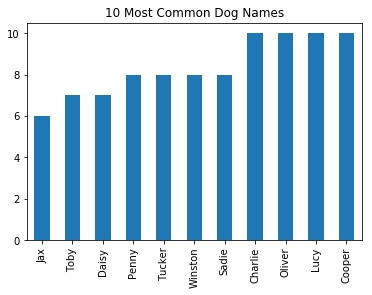

In [157]:
dog_df = df_final['name'] != 'NA'

name_df = df_final[dog_df].name.value_counts()[10::-1];

name_df.plot(kind='bar')
plt.title('10 Most Common Dog Names')
plt.show()

Text(0.5,1,'retweet_count')

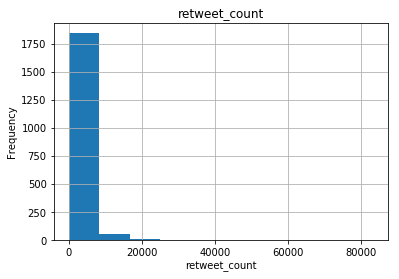

In [158]:
df_final.hist(column='retweet_count')
plt.xlabel("retweet_count")
plt.ylabel("Frequency")
plt.title('retweet_count')

Text(0.5,1,'favorite_count')

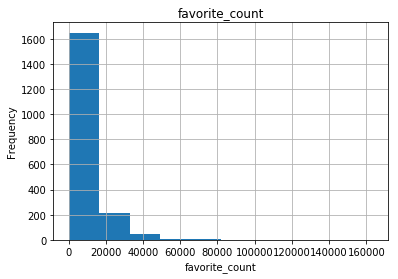

In [159]:
df_final.hist(column='favorite_count')
plt.xlabel("favorite_count")
plt.ylabel("Frequency")
plt.title('favorite_count')

Text(0.5,1,'Top 10 retweeted breeds')

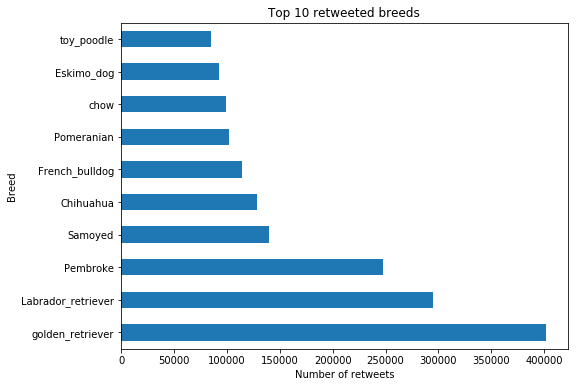

In [160]:
plt.figure(figsize=(8,6))
ax = df_final.groupby(['p1'])['retweet_count'].sum().sort_values(ascending=False)[:10].plot.barh()
ax.set_xlabel("Number of retweets")
ax.set_ylabel("Breed")
plt.title("Top 10 retweeted breeds")

Text(0.5,1,'Top 10 favorited breeds')

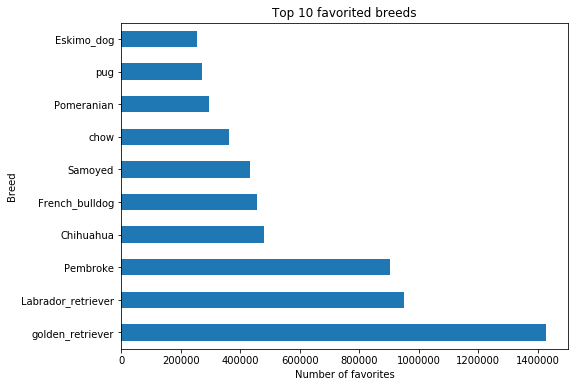

In [161]:
plt.figure(figsize=(8,6))
ax = df_final.groupby(['p1'])['favorite_count'].sum().sort_values(ascending=False)[:10].plot.barh()
ax.set_xlabel("Number of favorites")
ax.set_ylabel("Breed")
plt.title("Top 10 favorited breeds")

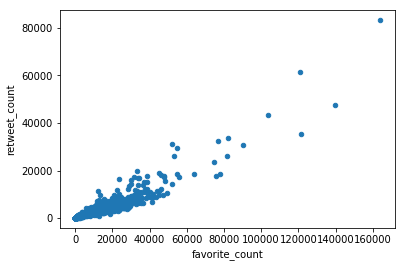

In [162]:
df_final.plot(y='retweet_count', x='favorite_count', kind='scatter')

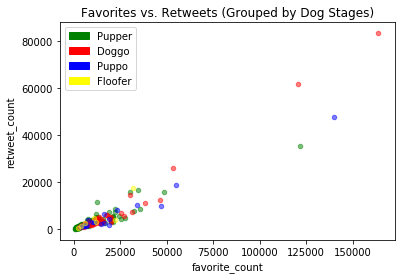

In [163]:
import matplotlib.patches as mpatches

df_puppers = df_final[df_final['stage'] == 'pupper']
df_puppo = df_final[df_final['stage'] == 'puppo']
df_doggo = df_final[df_final['stage'] == 'doggo']
df_floofer = df_final[df_final['stage'] == 'floofer']
df_none = df_final[df_final['stage'] == 'None']

bx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', alpha=0.5)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=bx, alpha=0.5)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=bx, alpha=0.5)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Yellow', ax=bx, alpha=0.5)

puppers = mpatches.Patch(label='Pupper', color = 'Green')
doggo = mpatches.Patch(label='Doggo', color = 'Red')
puppo = mpatches.Patch(label='Puppo', color = 'Blue')
floofer = mpatches.Patch(label='Floofer', color = 'Yellow')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.title('Favorites vs. Retweets (Grouped by Dog Stages)')

plt.show();

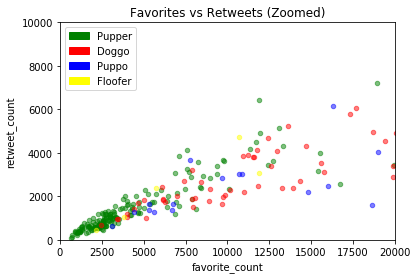

In [164]:
xlim = (0, 20000)
ylim = (0, 10000)

cx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', alpha=0.5, ylim=ylim, xlim=xlim)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=cx, alpha=0.5, ylim=ylim, xlim=xlim)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=cx, alpha=0.5, ylim=ylim, xlim=xlim)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Yellow', ax=cx, alpha=0.5, ylim=ylim, xlim=xlim)

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.title('Favorites vs Retweets (Zoomed)')

plt.show()

### Conclusion

Based on our chart, the names Oliver, Cooper, Lucy, and Charlie are the most common dog names, with each of those names occurring 40 times each throughout the dataset.

Golden retrievers are the most retweeted and favorited dog breed in the dataset, followed by Labrador retrievers and Pembroke Welsh Corgi's.

Finally, when comparing favorites and retweets, we see that puppers seem to be the most identified dog stage in the dataset. You can also see that doggos and puppos tend to have more favorites than retweets comparatively. 

### References

I referred to Udacity lessons, GitHub, and Stack Overflow for help to complete my anaylsis of this dataset.

In [165]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0